# Part 2

## Importing necessary libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')

In [4]:
data.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [5]:
data.shape

(156518, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156518 entries, 0 to 156517
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   location                             156518 non-null  object 
 1   iso_code                             156518 non-null  object 
 2   date                                 156518 non-null  object 
 3   total_vaccinations                   72497 non-null   float64
 4   people_vaccinated                    69398 non-null   float64
 5   people_fully_vaccinated              66744 non-null   float64
 6   total_boosters                       41255 non-null   float64
 7   daily_vaccinations_raw               60144 non-null   float64
 8   daily_vaccinations                   155416 non-null  float64
 9   total_vaccinations_per_hundred       72497 non-null   float64
 10  people_vaccinated_per_hundred        69398 non-null   float64
 11  people_fully_

Converting the data to datetime and name and iso code to str

In [14]:
data['date'] = pd.to_datetime(data['date'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156518 entries, 0 to 156517
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   location                             156518 non-null  object        
 1   iso_code                             156518 non-null  object        
 2   date                                 156518 non-null  datetime64[ns]
 3   total_vaccinations                   72497 non-null   float64       
 4   people_vaccinated                    69398 non-null   float64       
 5   people_fully_vaccinated              66744 non-null   float64       
 6   total_boosters                       41255 non-null   float64       
 7   daily_vaccinations_raw               60144 non-null   float64       
 8   daily_vaccinations                   155416 non-null  float64       
 9   total_vaccinations_per_hundred       72497 non-null   float64       
 

replacing the nan with zeros

In [19]:
data['total_vaccinations']= data['total_vaccinations'].fillna(0)

grouping by date

In [20]:
df = data.groupby(by = ['date'])['total_vaccinations'].sum()

Plotting the data

In [31]:
df

date
2020-12-02    0.000000e+00
2020-12-03    0.000000e+00
2020-12-04    5.000000e+00
2020-12-05    4.000000e+00
2020-12-06    4.000000e+00
                  ...     
2023-02-17    4.490975e+10
2023-02-18    4.462018e+10
2023-02-19    4.535745e+10
2023-02-20    4.352706e+10
2023-02-21    4.277068e+10
Name: total_vaccinations, Length: 812, dtype: float64

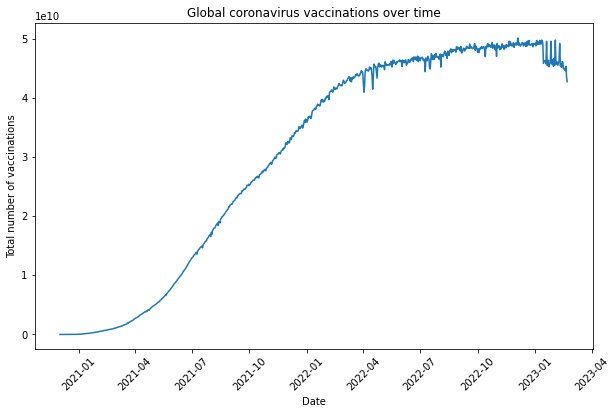

In [46]:
figure = plt.figure(figsize = (10,6))
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Total number of vaccinations')
plt.xticks(rotation=45)
plt.title('Global coronavirus vaccinations over time');

## Regression Analysis:
For the regression model, i will first label encode the date column since it is an ordinal data.

In [51]:
df = pd.DataFrame(df)
df = df.reset_index()

label encoding the date column

In [65]:
first_date = df.iloc[0]['date']

In [66]:
df['days'] = df['date'] - first_date

In [67]:
df['days'] = df['days'].apply(lambda x : int(str(x).split()[0]))

Creating the train and test data

In [96]:
X = df['days']
y = df['total_vaccinations']

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size= 0.75, random_state = 42)

In the question it was asked to fit the whole data to the model. So rather than the train data I am giving the whole data to the mdoel.

In [79]:
model1 = LinearRegression()

In [98]:
X = np.array(X).reshape(812,-1)
y = np.array(y).reshape(812,-1)

In [99]:
model1.fit(X,y)

LinearRegression()

In [100]:
y_pred = model1.predict(X)

Mean Square Error:

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
mse = mean_squared_error(y,y_pred)
r2  = r2_score(y,y_pred)

In [110]:
print(f'The root mean square error of our regression is: {np.sqrt(mse)}')
print(f"the R2 score of the model is: {r2}")

The root mean square error of our regression is: 5763831183.782436
the R2 score of the model is: 0.9021182108442227


plotting the predicted vs actual data

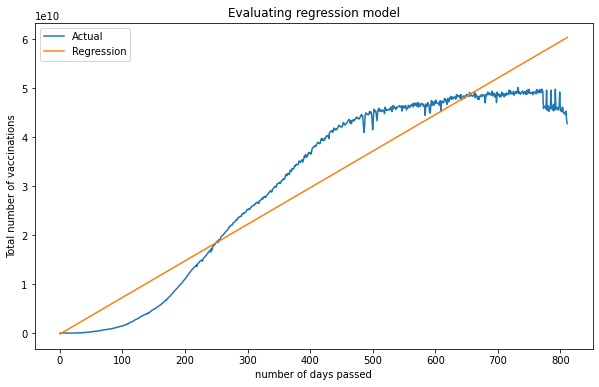

In [105]:
figure = plt.figure(figsize = (10,6))
plt.plot(y)
plt.plot(y_pred)
plt.xlabel('number of days passed')
plt.ylabel('Total number of vaccinations')
plt.title('Evaluating regression model')
plt.legend(['Actual','Regression'])

----

## South Korea:

In [137]:
sk = data[(data.location == 'South Korea') & (data.date.between(pd.to_datetime('2021-08-01'),pd.to_datetime('2021-10-08')))][['date','total_vaccinations']]

In [138]:
sk = sk.reset_index(drop = True)

In [139]:
sk['day'] = sk ['date'] - first_date

In [140]:
sk['day'] = sk['day'].apply(lambda x : int(str(x).split()[0]))

In [147]:
#train and test data: 
train  = sk[['day','total_vaccinations']].iloc[:-8,:]
test   = sk[['day','total_vaccinations']].iloc[-8:,:]

In [148]:
train.shape

(61, 2)

In [149]:
model2 = LinearRegression()

In [153]:
x_train = np.array(train['day']).reshape(61,-1)
x_test = np.array(test['day']).reshape(-1,1)

In [155]:
y_train = train['total_vaccinations']
y_test  = test['total_vaccinations']

In [156]:
model2.fit(x_train,y_train)

LinearRegression()

In [158]:
y_pred = model2.predict(x_test)

In [163]:
#predicting the mean squared error
mse = mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)

In [168]:
print(f'The RMSE is : {rmse}')
print(f'The difference to the given threshold is (rmse - 750000):{rmse - 750000}')
print(f'R2 score is : {r2_score(y_pred,y_test)}')

The RMSE is : 745358.0723030564
The difference to the given threshold is (rmse - 750000):-4641.927696943632
R2 score is : 0.7676087442259245


As we can see my model perfomrs better than the set threshold